### Questions
* Evaluation Metrics - 
    * Always a good interview question to come up with scenarios where 
        * recall is a good metric or precision, etc
* Distance - 
    * Euclidian vs Minikowski vs Manhattan vs other metrics

### Objectives
YWBAT 
* code KNN from scratch - ???
* evaluate it using a confusion matrix
* apply evaluation metrics to a KNN model

### Outline

In [82]:
import pandas as pd
import numpy as np

from sklearn.metrics import confusion_matrix, r2_score, recall_score, f1_score, precision_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split, cross_validate

import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Distance Metrics
def minkowski(v1, v2, p):
    total_distance = np.sum(np.abs(v1 - v2)**p)
    return total_distance**(1/p)

In [31]:
v1 = np.array([0, 0])
v2 = np.array([3, 4])
v3 = np.array([2, 4.5])

In [34]:
for p in np.linspace(1, 5, 9):
    print("p = {}".format(p))
    print("d1 = {}".format(minkowski(v1, v2, p))) # is one always smaller
    print("d2 = {}".format(minkowski(v1, v3, p)))
    print("-"*20)

p = 1.0
d1 = 7.0
d2 = 6.5
--------------------
p = 1.5
d1 = 5.584250376480029
d2 = 5.349937402825397
--------------------
p = 2.0
d1 = 5.0
d2 = 4.924428900898052
--------------------
p = 2.5
d1 = 4.688140842343588
d2 = 4.728278858112068
--------------------
p = 3.0
d1 = 4.497941445275415
d2 = 4.628011187371595
--------------------
p = 3.5
d1 = 4.372215289689355
d2 = 4.573727528347276
--------------------
p = 4.0
d1 = 4.284572294953817
d2 = 4.5432677064496225
--------------------
p = 4.5
d1 = 4.221163518110637
d2 = 4.52575314162099
--------------------
p = 5.0
d1 = 4.174027662897746
d2 = 4.515500227570816
--------------------


In [66]:
data = make_blobs(n_samples=500, n_features=2, cluster_std=4.0, centers=2)
points, labels = data

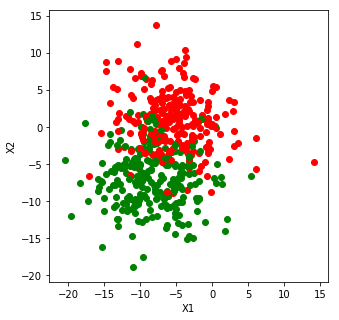

In [67]:
plt.figure(figsize=(5, 5))
color_dict = {0: 'r', 1: 'g'}
for p, l in zip(points, labels):
    plt.scatter(p[0], p[1], c=color_dict[l])
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [68]:
xtrain, xtest, ytrain, ytest = train_test_split(points, labels, train_size=0.70)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [69]:
for p in np.linspace(1, 5, 9):
    for n in [3, 4, 5]:
        print("p = {}, n = {}".format(p, n))
        knn = KNeighborsClassifier(n_neighbors=n, p=p)
        knn.fit(xtrain, ytrain)
        print(knn.score(xtest, ytest)) # accuracy score
        print("-"*50)

p = 1.0, n = 3
0.8333333333333334
--------------------------------------------------
p = 1.0, n = 4
0.8466666666666667
--------------------------------------------------
p = 1.0, n = 5
0.8666666666666667
--------------------------------------------------
p = 1.5, n = 3
0.8533333333333334
--------------------------------------------------
p = 1.5, n = 4
0.8466666666666667
--------------------------------------------------
p = 1.5, n = 5
0.86
--------------------------------------------------
p = 2.0, n = 3
0.86
--------------------------------------------------
p = 2.0, n = 4
0.8466666666666667
--------------------------------------------------
p = 2.0, n = 5
0.86
--------------------------------------------------
p = 2.5, n = 3
0.8733333333333333
--------------------------------------------------
p = 2.5, n = 4
0.8533333333333334
--------------------------------------------------
p = 2.5, n = 5
0.8666666666666667
--------------------------------------------------
p = 3.0, n = 3
0.87333

In [70]:
knn = KNeighborsClassifier(n_neighbors=5, p=5)
knn.fit(xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=5,
           weights='uniform')

In [59]:
# how do we evaluate?

In [60]:
# evaluation metrics

In [79]:
# plot a confusion matrix
y_pred = knn.predict(xtest)
cm = confusion_matrix(ytest, y_pred)

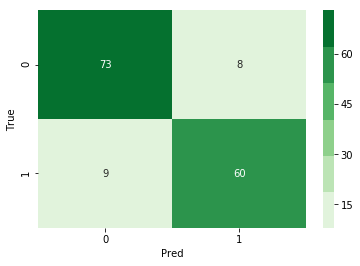

In [80]:
sns.heatmap(cm, annot=True, cmap=sns.color_palette('Greens'))
plt.xlabel("Pred")
plt.ylabel("True")
plt.show()

In [81]:
# example of minimizing false negatives

# ad serving, predicting if an ad will get clicked.  
# 0s - 5M+ 
# 10k - 1s

# 1/500
# if I'm using accuracy then I would make a model that always predicts 0
# accuracy = 0.99995

# in this case use recall, because recall minimizes your FN rate
# recall -> "better safe than sorry"
# recall -> "cancer test for first/second screening"


# precision -> "predicting if a baby is going to have some condition"
# precision -> "if someone needs chemo"

In [ ]:
cross_validate() # this tool contains a 'scoring' parameter where you can feed recall/f1/precision/accuracy

### Assessment/What did we learn?
* 100% accuracy isn't a great predictor
* Using different metrics of distance leads to different neighborhoods
* Reasons to favor recall over precision and vice versa
* Confusion Matrix is a great evaluation tool
* sklearn has a KNN tool